Import Libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

load the Dataset

In [20]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/activity14/WA_Fn-UseC_-Telco-Customer-Churn (1).csv")  # Change path if needed
print("STEP 2 - First 5 rows of original dataset:")
print(df.head(), "\n")


STEP 2 - First 5 rows of original dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Strea

Split into 4 different tables

In [21]:
customers = df[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']]
services = df[['customerID', 'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies']]
contracts = df[['customerID', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                'MonthlyCharges', 'TotalCharges']]
churn = df[['customerID', 'Churn']]

print("STEP 3 - Customers table columns:", customers.columns.tolist())
print("STEP 3 - Services table columns:", services.columns.tolist())
print("STEP 3 - Contracts table columns:", contracts.columns.tolist())
print("STEP 3 - Churn table columns:", churn.columns.tolist(), "\n")


STEP 3 - Customers table columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']
STEP 3 - Services table columns: ['customerID', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
STEP 3 - Contracts table columns: ['customerID', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
STEP 3 - Churn table columns: ['customerID', 'Churn'] 



Merge all the tables

In [22]:
merged_df = customers.merge(services, on='customerID')\
                     .merge(contracts, on='customerID')\
                     .merge(churn, on='customerID')
print("STEP 4 - Merged dataset preview:")
print(merged_df.head(), "\n")

STEP 4 - Merged dataset preview:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Str

clean and encode dataset

In [23]:
merged_df.drop('gender', axis=1, inplace=True)  # Remove gender
merged_df['TotalCharges'] = pd.to_numeric(merged_df['TotalCharges'], errors='coerce')
merged_df.dropna(inplace=True)  # Remove rows with missing values

# Encode categorical columns
le = LabelEncoder()
for col in merged_df.columns:
    if merged_df[col].dtype == 'object':
        merged_df[col] = le.fit_transform(merged_df[col])

print("STEP 5 - Cleaned & Encoded dataset preview:")
print(merged_df.head(), "\n")

STEP 5 - Cleaned & Encoded dataset preview:
   customerID  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0        5365              0        1           0       1             0   
1        3953              0        0           0      34             1   
2        2558              0        0           0       2             1   
3        5524              0        0           0      45             0   
4        6500              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0       

Split into Features and Target

In [24]:
X = merged_df.drop('Churn', axis=1)
y = merged_df['Churn']
print(f"STEP 6 - Features shape: {X.shape}, Target shape: {y.shape}\n")


STEP 6 - Features shape: (7032, 19), Target shape: (7032,)



Train/Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"STEP 7 - X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"STEP 7 - y_train: {y_train.shape}, y_test: {y_test.shape}\n")


STEP 7 - X_train: (5625, 19), X_test: (1407, 19)
STEP 7 - y_train: (5625,), y_test: (1407,)



Logistic Regression Model

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("STEP 9 - Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf), "\n")



STEP 9 - Random Forest Results
Accuracy: 0.7917555081734187
Confusion Matrix:
 [[938  95]
 [198 176]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.86      1033
           1       0.65      0.47      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407
 



Heatmaps Confusion Matrices

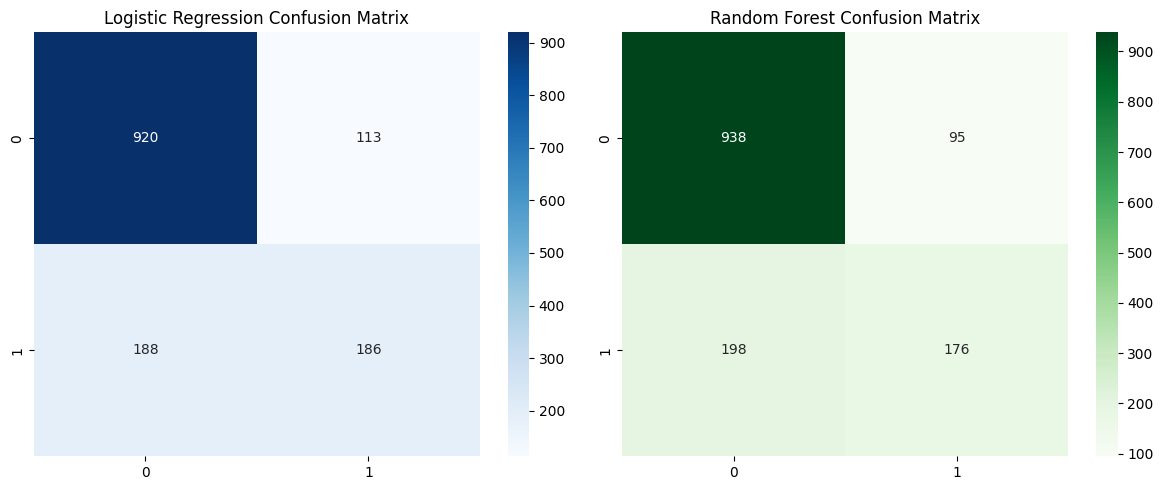

In [27]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()